In [1]:
# Importing Libraries

import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install datasets
from datasets import load_dataset

# Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# FIlter for the job titles and country

df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [9]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

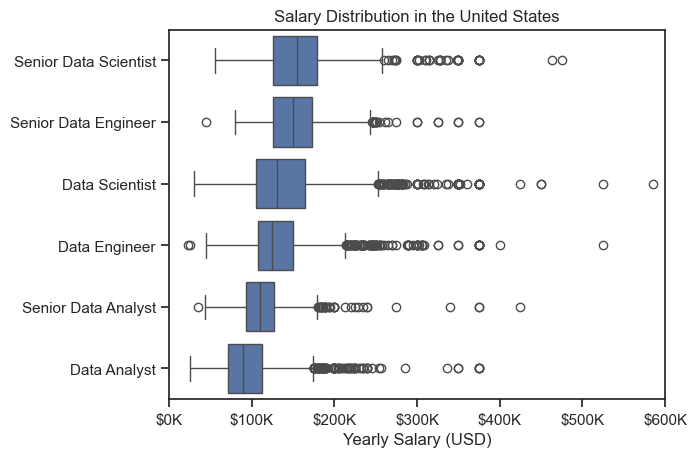

In [10]:
# Boxplot

sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order = job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show() 

In [11]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [12]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [13]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [18]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [28]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

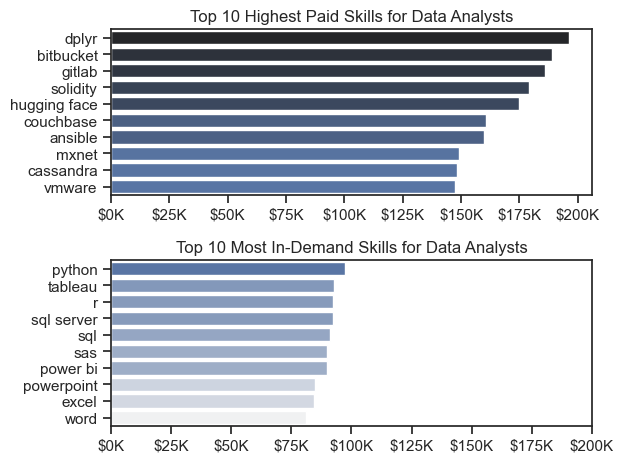

In [31]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

#Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.xlim(0, 200000)
plt.tight_layout()
plt.show()